## 회귀분석

### 지도학습 예제 : 단순선형회귀 
#### 직선을 data에 맞게 적합시킴

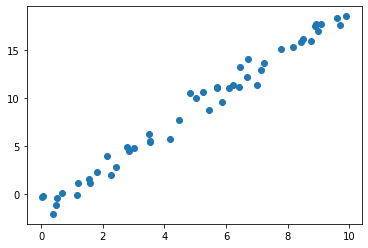

In [47]:
import matplotlib.pyplot as plt 
import numpy as np

rng = np.random.RandomState(410) #시드값 고정을 안하면 값이 계속 바뀜 
x = 10 * rng.rand(50) # 랜덤값에 * 10을 함(50개뽑아줌)
y = 2 * x - 1 + rng.randn(50)#randn() : 표준정규분포를 근거로 랜덤하게 뽑아주는것 
plt.scatter(x,y)
#회귀직선을 보여주기 위해서 랜덤하게 표현

#### 모델 하이퍼파라미터를 선택
##### 회귀분석을 할 수 있는 클래스 객체를 만들고 fit_intercept하이퍼파라미터를 사용해서 적합..

In [48]:
from sklearn.linear_model import LinearRegression
#회귀분석을 하기위해서 사용하는 패키지 

In [49]:
model = LinearRegression(fit_intercept = True) 
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 데이터를 특정 매트릭스와 타겟 벡터로 정리해 넣기

In [50]:
X = x[:, np.newaxis]
#기존의 x는 1차원이라서 2차원으로 만들어주기 위해서 컬럼이 1개인 독립변수로 만들어주는 과정 
X.shape
#column이 한개인 단순회귀분석을 할 예정 

(50, 1)

In [51]:
model.fit(X,y)
#모델을 학습시켜줌

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#####  모델 적합의 결과 확인 (기울기, 절편)

In [52]:
model.coef_
#최적의 회귀선이라고 생각 
#대략적으로 비슷하게 한것 같음 

array([2.08486896])

In [53]:
model.intercept_
#모델의 y절편을 보여줌
#intercept_ : y절편을 알려주는 함수 

-1.5434995008378891

###### 입력값 생성 

In [57]:
xfit = np.linspace(-1,11)

In [58]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

#### 결과 시각화

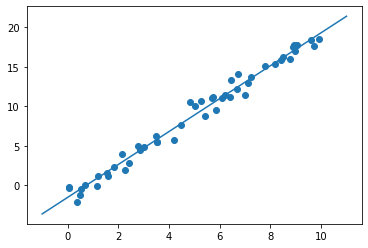

In [61]:
plt.scatter(x,y) #원래의 학습 데이터 
plt.plot(xfit, yfit)
#학습데이터를 통해 학습한 회귀직선을 원 데이터분포에 그려줌
#그래프 두개가 겹쳐진다는 것은 처음 알았뜸....

#### 종속변수의 형태는 무조건 수직으로 column이 하나인 구조로 설정을 해줘야만 한다
#####  종속변수는 무조건 하나의 y값을 가져야한다

### 보스턴 

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline #출력영역에 그래프를 그리게 하는 것 

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('크기 :', bostonDF.shape)
bostonDF.head()

크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
print(boston.DESCR)
#DESCR : 데이터에 대한 설명을 보여주는 함수 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### EDA

#### 각 피처에 대해 값이 증가할 수록 PRICE값이 어떻게 변하는지 확인 
#### 사본의 regplot()함수는 X,Y의 산점도와 함께 회귀직선을 그려줌 
#### subplots()으로 여러개의 그래프를 한번에 표현하도록 설정

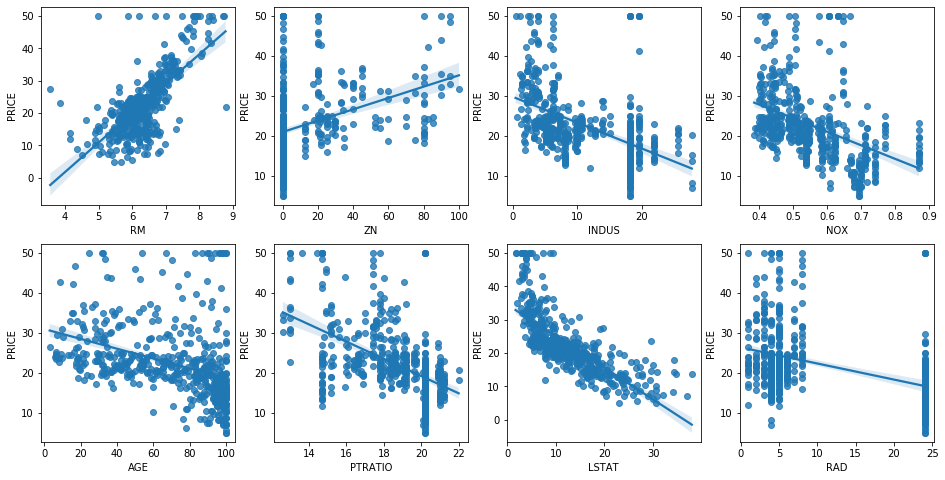

In [78]:
fig, axs = plt.subplots(figsize = (16, 8), ncols =4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x = feature, y= 'PRICE', data = bostonDF, ax = axs[row][col])
#PRICE와 각 컬럼을 대비하여 산점도 그래프를 출력하고 회귀직선또한 출력 

In [83]:
bostonDF.corr()['PRICE']
#PRICE에 대한 상관계수를 출력 
#RM과 LSTAT이 괜찮은 상관관계를 보이고 있음

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

#### 보스턴데이터를 통한 회귀모델만들기
##### mse와 R2 메트릭을 활용
##### rmse는 mse를 sqrt해서 구함

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False) #PRICE를 열을 기준으로 지움 

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 2015)


#모델을 설정하고 데이터를 넣기 
lr = LinearRegression()

lr.fit(X_train, y_train)
#모델에 학습 데이터를 학습시킴 

y_preds = lr.predict(X_test)
#학습된 모델에 새로운 검증 데이터를 넣어 예측치를출력 

mse = mean_squared_error(y_test, y_preds)
#실제값과 추정값을 가지고 mse를 출력 
rmse = np.sqrt(mse)
#mse에 루트를 넣어줌 

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
#최종적으로 모델의 설명력은 75.3%정도이며 RMSE는 4.95정도로 나오는 모델이 만들어졌음 

MSE : 24.518, RMSE : 4.952
Variance score : 0.753


#### 절편과 기울기

In [89]:
print('Y 절편 : ', lr.intercept_)
print('회귀계수의 값 :', np.round(lr.coef_, 1))
#특정 컬럼만 계수가 높으며 나머지는 그다지 모델에 영향을 주지못하는 것을 보여줌 

Y 절편 :  39.0609821505151
회귀계수의 값 : [ -0.1   0.1  -0.    2.6 -16.4   3.1  -0.   -1.6   0.3  -0.   -0.8   0.
  -0.5]


In [91]:
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
#컬럼에 맞는 회귀계수를 출력해주는 코드 
coeff.sort_values(ascending = False)
#유의미한 컬럼들은 RM, CHAS, DIS, NOX정도가 존재 

RM          3.1
CHAS        2.6
RAD         0.3
ZN          0.1
B           0.0
TAX        -0.0
AGE        -0.0
INDUS      -0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.8
DIS        -1.6
NOX       -16.4
dtype: float64

#### 5개의 fold로 교차검증(metric = MSE, RMSE)
#####  사이킷런의 지표평가 기준은 높은 지표값일 수록 좋은 모델이라 MSE값에 -1을 곱해서 반환하므로 반환값에 -1을 다시 곱해야 원래의 양의 값인 MSE가 되기 때문 

In [94]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False )
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
#5번의 교차검증을 통해서 mse값을 출력 
#사이킷런은 mse를 음수로 출력을 하기때문에 -1을 곱해주어야함 
rmse_scores = np.sqrt(-1 * neg_mse_scores)
#RMSE를 구하기 위해서는 -1를 곱해준 값에 루트를 사용
avg_rmse = np.mean(rmse_scores)
#5개의 RMSE들을 평균 

print('5 folds의 개별 Negative MSE scores : ' , np.round(neg_mse_scores, 2))
#교차검증마다 MSE의 값이 차이가 나는데 이건 MSE가 제곱을 하기 떄문에 값이 크게 차이가 나도록 보일 수 있음
#그래서 RMSE를 통해 실제값과 추정값의 차이를 보는 것이 중요함 
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


### 일반적으로 회귀는 MSE값이 낮을 수록 좋은 회귀모델 